In [1]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

import utils

sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1)
plt.rcParams['figure.figsize'] = (17, 5)

In [3]:
tracks = pd.read_pickle("clean_data/track.pkl")
tracks.sample(3)

date_created  duration      genre_top          title  \
track_id                                                               
42240    2011-01-13 18:55:05       210  International  Vranski Cocek   
49536    2011-06-24 07:16:58       458           Rock   final notice   
75903    2013-01-11 17:28:01       127           Rock         D.E.S.   

                                                      album  album_tracks  \
track_id                                                                    
42240     Live @ WFMU on Transpacific Sound Paradise Jan...            32   
49536                                     Brick City Ghosts             9   
75903                                       The Fired Dept.            12   

                                       artist              location  \
track_id                                                              
42240           Zlatne Uste Balkan Brass Band    Brooklyn, NY 11210   
49536     Riding Alone For Thousands Of Miles     New Brunswick, NJ   
75903                            The Monitors  Tucson, Arizona, USA   

          acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
42240         0.985862      0.644822  0.440038          0.930993  0.140937   
49536         0.595313      0.613036  0.397511          0.941366  0.385371   
75903         0.023536      0.497340  0.663416          0.395973  0.212704   

          speechiness    tempo   valence  
track_id                                  
42240        0.085442  142.954  0.857396  
49536        0.040060  121.901  0.034809  
75903        0.043915  108.237  0.401741

In [4]:
tracks.dtypes

date_created        datetime64[ns]
duration                     int64
genre_top                 category
title                       object
album                       object
album_tracks                 int64
artist                      object
location                    object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
speechiness                float64
tempo                      float64
valence                    float64
dtype: object

In [5]:
tracks.columns

Index(['date_created', 'duration', 'genre_top', 'title', 'album',
       'album_tracks', 'artist', 'location', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [6]:
tracks.shape

(8864, 16)

In [7]:
dup_rows = tracks[tracks.duplicated()]
dup_rows.shape

(0, 16)

In [8]:
tracks.isnull().sum()

date_created           0
duration               0
genre_top              0
title                  1
album                  0
album_tracks           0
artist                 0
location            2854
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
dtype: int64

## MATRIZ DE CORRELACIÓN

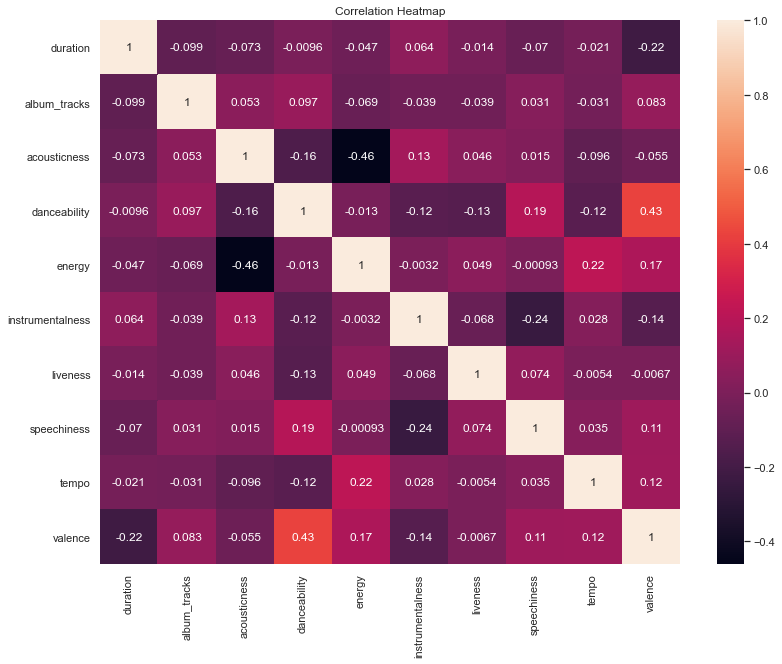

In [9]:
plt.figure(figsize=(13,10))
sns.heatmap(tracks.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
tracks.genre_top.value_counts()

Rock                   3711
Electronic             2037
Hip-Hop                 904
Folk                    834
Old-Time / Historic     352
Pop                     341
Classical               202
Jazz                    195
International           129
Instrumental             78
Blues                    64
Experimental             17
Name: genre_top, dtype: int64

### Histograma de generos

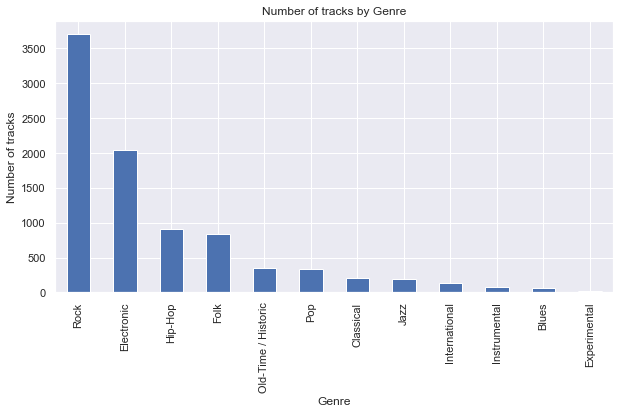

In [11]:
tracks.genre_top.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of tracks by Genre")
plt.ylabel("Number of tracks")
plt.xlabel("Genre");

## Creacion Dummies de generos

In [12]:
Data1= pd.get_dummies(tracks.genre_top)
tracks = pd.concat([tracks, Data1], 1)
tracks.shape

(8864, 28)

In [13]:
tracks.columns

Index(['date_created', 'duration', 'genre_top', 'title', 'album',
       'album_tracks', 'artist', 'location', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'valence', 'Blues', 'Classical', 'Electronic', 'Experimental', 'Folk',
       'Hip-Hop', 'Instrumental', 'International', 'Jazz',
       'Old-Time / Historic', 'Pop', 'Rock'],
      dtype='object')

Text(0, 0.5, 'Tracks')

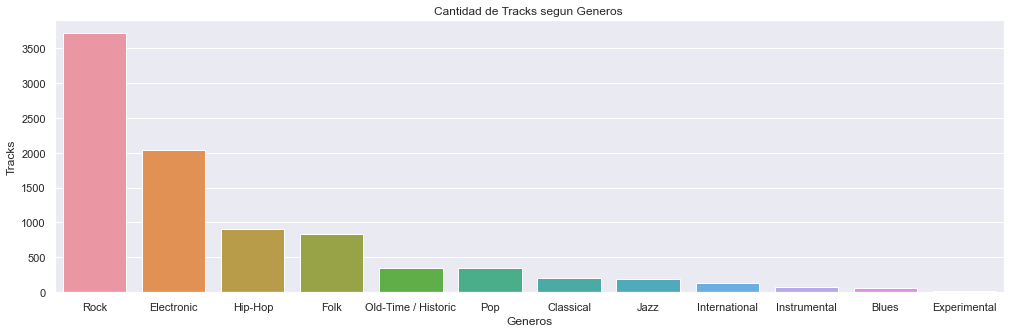

In [14]:
sns.barplot(tracks.genre_top.value_counts().index, tracks.genre_top.value_counts(), order=list(tracks.genre_top.value_counts().index))
plt.title("Cantidad de Tracks segun Generos ")
plt.xlabel("Generos")
plt.ylabel("Tracks")

Correlacion entre variables

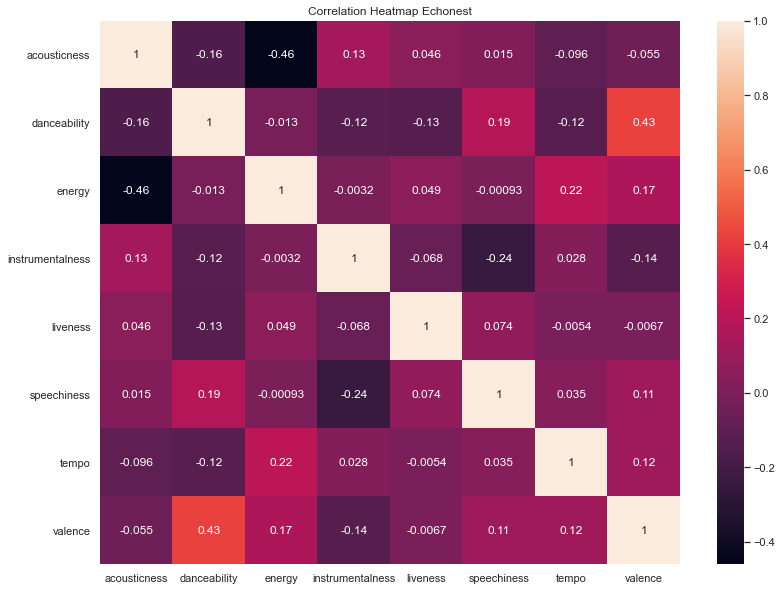

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.163689 -0.460767          0.133100   
danceability         -0.163689      1.000000 -0.013074         -0.119367   
energy               -0.460767     -0.013074  1.000000         -0.003210   
instrumentalness      0.133100     -0.119367 -0.003210          1.000000   
liveness              0.045641     -0.133576  0.048741         -0.067784   
speechiness           0.015398      0.192918 -0.000925         -0.239020   
tempo                -0.096115     -0.120173  0.222533          0.028374   
valence              -0.055189      0.429147  0.166572         -0.135260   

                  liveness  speechiness     tempo   valence  
acousticness      0.045641     0.015398 -0.096115 -0.055189  
danceability     -0.133576     0.192918 -0.120173  0.429147  
energy            0.048741    -0.000925  0.222533  0.166572  
instrumentalness -0.067784    -0.239020  0.028374 -0.135260  
liveness          1.000000     0.073934 -0.005435 -0.006723  
speechiness       0.073934     1.000000  0.035201  0.113967  
tempo            -0.005435     0.035201  1.000000  0.119026  
valence          -0.006723     0.113967  0.119026  1.000000

In [15]:
#Correlacion entre Variables de echones 
lista_echones=['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo','valence']
corr = tracks[lista_echones].corr()

plt.figure(figsize=(13,10))
sns.heatmap(corr,annot=True)
plt.title("Correlation Heatmap Echonest")
plt.show()
corr

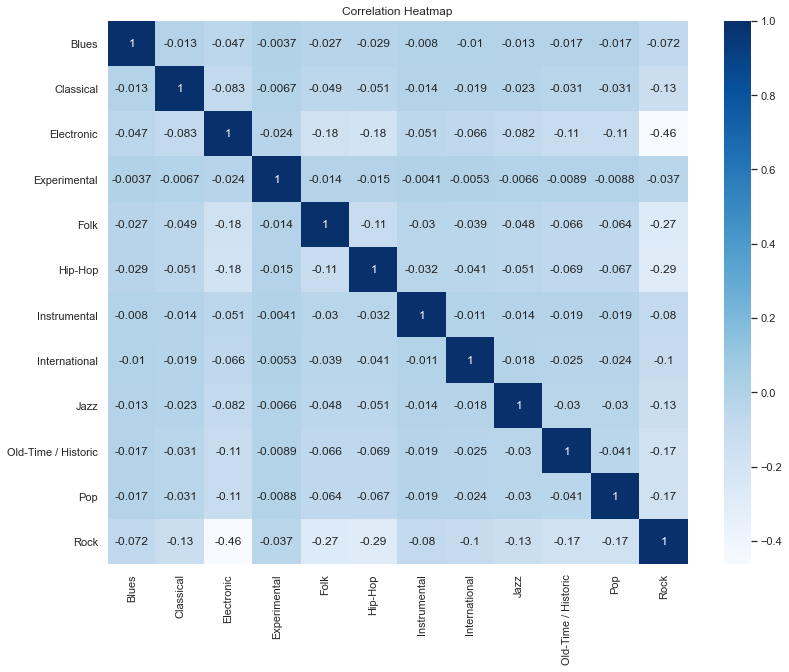

Blues  Classical  Electronic  Experimental      Folk  \
Blues                1.000000  -0.013023   -0.046583     -0.003738 -0.027484   
Classical           -0.013023   1.000000   -0.083416     -0.006694 -0.049214   
Electronic          -0.046583  -0.083416    1.000000     -0.023945 -0.176038   
Experimental        -0.003738  -0.006694   -0.023945      1.000000 -0.014127   
Folk                -0.027484  -0.049214   -0.176038     -0.014127  1.000000   
Hip-Hop             -0.028739  -0.051463   -0.184081     -0.014773 -0.108606   
Instrumental        -0.008035  -0.014389   -0.051467     -0.004130 -0.030365   
International       -0.010364  -0.018558   -0.066381     -0.005327 -0.039164   
Jazz                -0.012790  -0.022903   -0.081924     -0.006574 -0.048335   
Old-Time / Historic -0.017342  -0.031054   -0.111080     -0.008914 -0.065536   
Pop                 -0.017058  -0.030546   -0.109260     -0.008768 -0.064462   
Rock                -0.072371  -0.129593   -0.463549     -0.037200 -0.273490   

                      Hip-Hop  Instrumental  International      Jazz  \
Blues               -0.028739     -0.008035      -0.010364 -0.012790   
Classical           -0.051463     -0.014389      -0.018558 -0.022903   
Electronic          -0.184081     -0.051467      -0.066381 -0.081924   
Experimental        -0.014773     -0.004130      -0.005327 -0.006574   
Folk                -0.108606     -0.030365      -0.039164 -0.048335   
Hip-Hop              1.000000     -0.031753      -0.040954 -0.050543   
Instrumental        -0.031753      1.000000      -0.011450 -0.014131   
International       -0.040954     -0.011450       1.000000 -0.018226   
Jazz                -0.050543     -0.014131      -0.018226  1.000000   
Old-Time / Historic -0.068530     -0.019161      -0.024713 -0.030499   
Pop                 -0.067408     -0.018847      -0.024308 -0.029999   
Rock                -0.285985     -0.079959      -0.103129 -0.127276   

                     Old-Time / Historic       Pop      Rock  
Blues                          -0.017342 -0.017058 -0.072371  
Classical                      -0.031054 -0.030546 -0.129593  
Electronic                     -0.111080 -0.109260 -0.463549  
Experimental                   -0.008914 -0.008768 -0.037200  
Folk                           -0.065536 -0.064462 -0.273490  
Hip-Hop                        -0.068530 -0.067408 -0.285985  
Instrumental                   -0.019161 -0.018847 -0.079959  
International                  -0.024713 -0.024308 -0.103129  
Jazz                           -0.030499 -0.029999 -0.127276  
Old-Time / Historic             1.000000 -0.040676 -0.172572  
Pop                            -0.040676  1.000000 -0.169745  
Rock                           -0.172572 -0.169745  1.000000

In [17]:
#Correlacion entre Generos 
lista_generos=['Blues', 'Classical', 'Electronic', 'Experimental', 'Folk',
       'Hip-Hop', 'Instrumental', 'International', 'Jazz',
       'Old-Time / Historic', 'Pop', 'Rock']

corr = tracks[lista_generos].corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr,annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()
corr

In [23]:
#Funcion de heatmap por genero

def plot_genero(df, genero):
    plt.figure(figsize=(2,5))
    sns.heatmap(df.corr()[[genero]],annot=True)
    plt.title("Correlation Heatmap Echonest by GENERO: "+genero)
    plt.show()


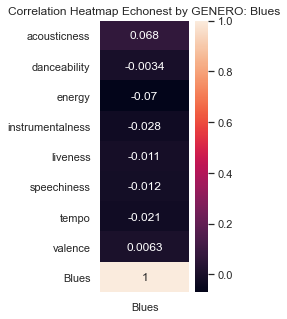

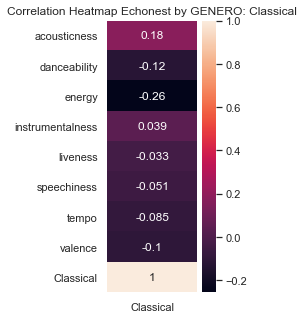

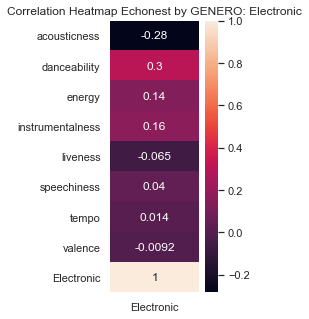

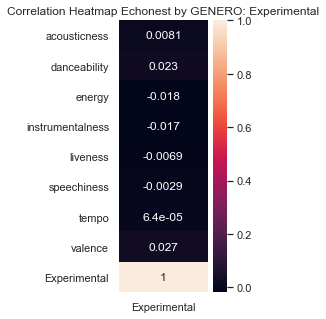

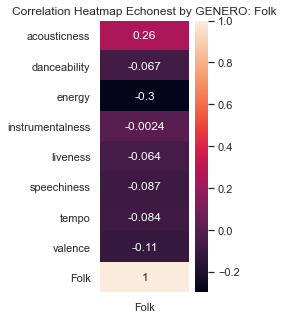

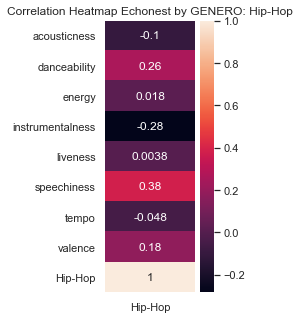

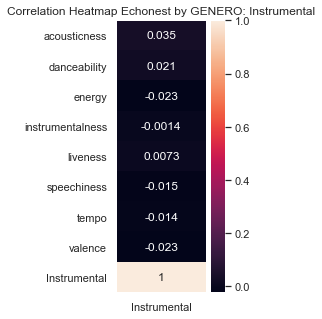

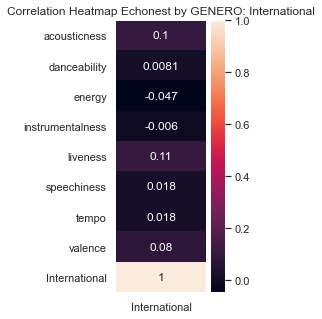

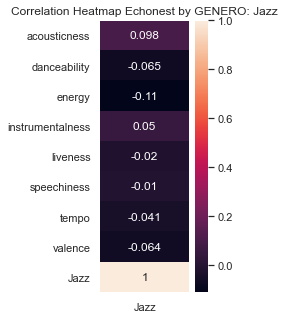

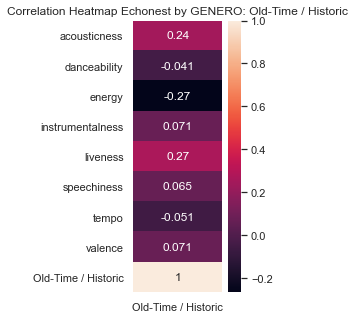

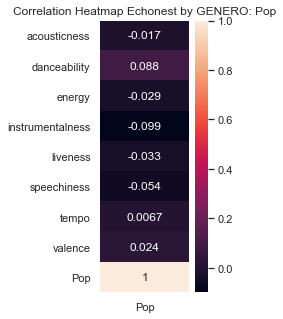

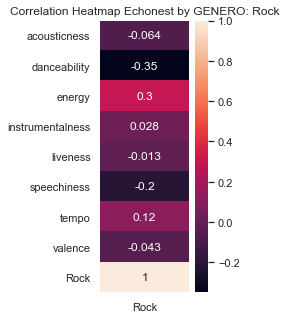

In [24]:
lista_echones=['acousticness', 'danceability','energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo','valence']

for x in lista_generos: 
    df = tracks[lista_echones +[x]]
    plot_genero(df, x)
    

### Visuales de Fechas

<Figure size 1224x360 with 0 Axes>

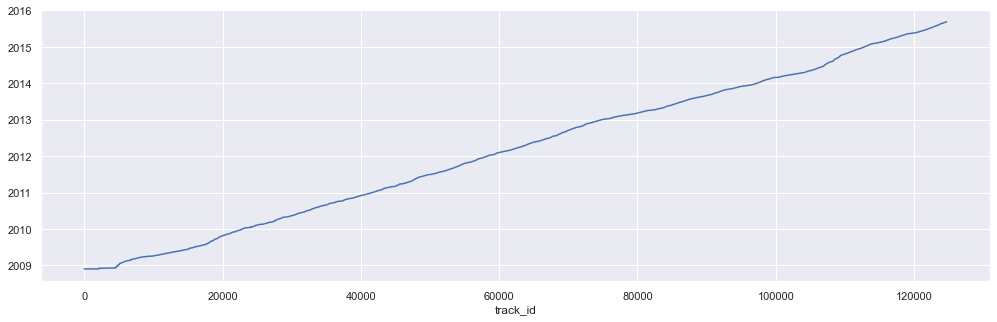

<Figure size 1224x360 with 0 Axes>

In [25]:
import time
import datetime
from datetime import date
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.palettes import Category20
from bokeh.models import HoverTool

keys = tracks["genre_top"].unique()

colors = [Category20[20][i] for i in range(20) ]
colormap = dict(zip(keys, colors))
colormap

tracks['date_created'].plot()
plt.figure()

### Visuales de Duracion

Text(0, 0.5, 'Duracion')

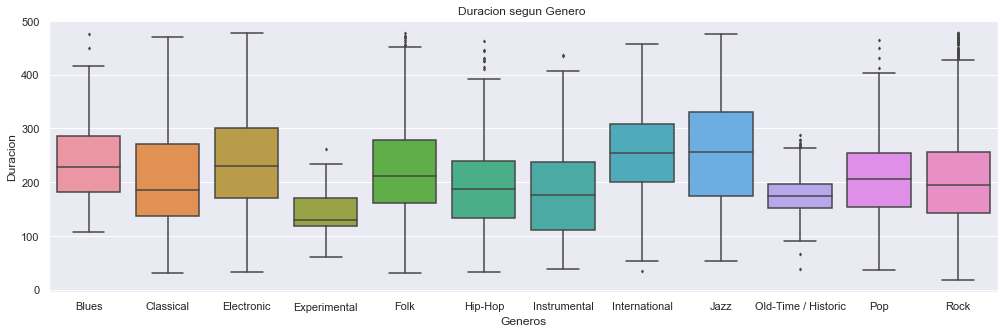

In [26]:
ax = sns.boxplot(x="genre_top", y="duration", data=tracks, fliersize=2)
plt.title("Duracion segun Genero ")
plt.xlabel("Generos")
plt.ylabel("Duracion")

In [29]:
def boxplot_echonest (df, echonest):
    ax = sns.boxplot(x="genre_top", y=echonest, data= df, fliersize=2)
    plt.title("Genero por  "+ echonest)
    plt.xlabel("Generos")
    plt.ylabel(echonest)
    plt.show()

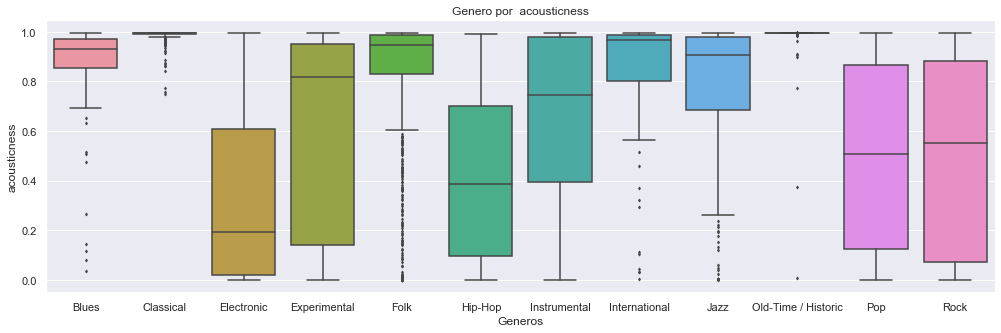

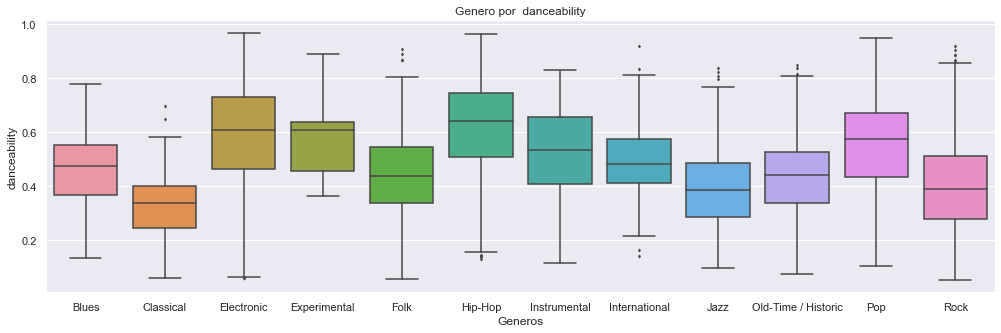

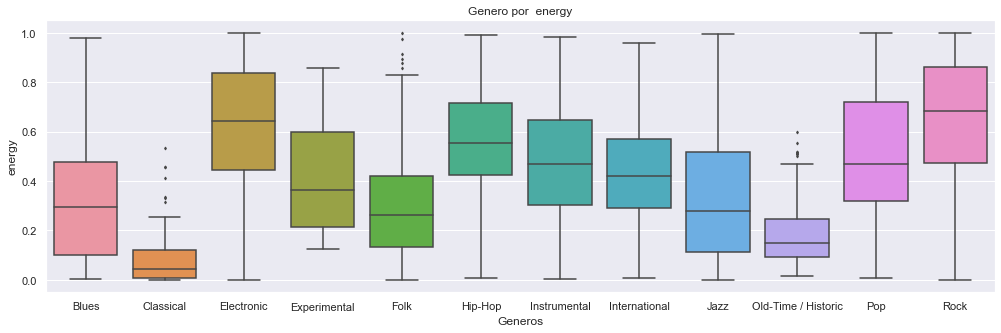

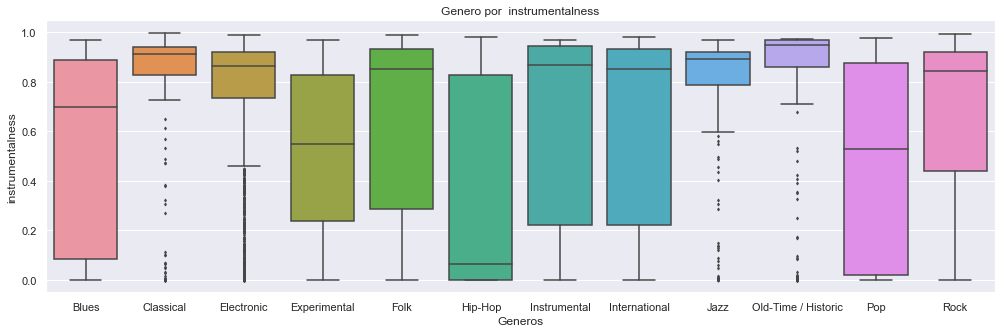

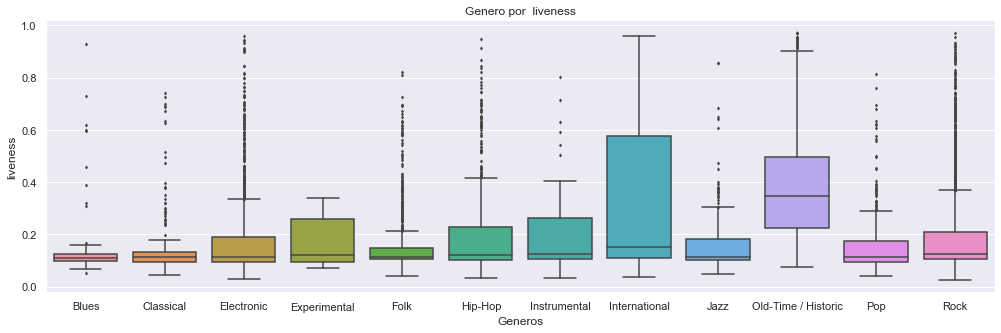

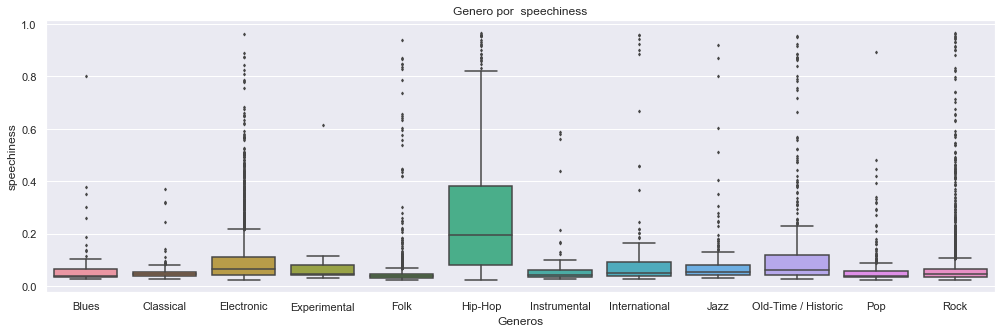

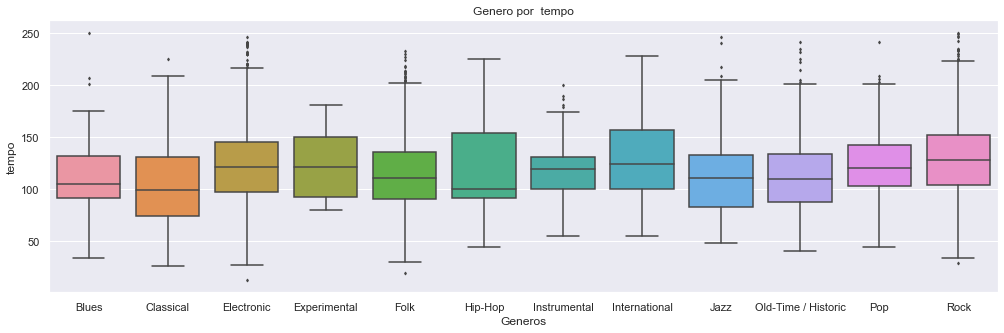

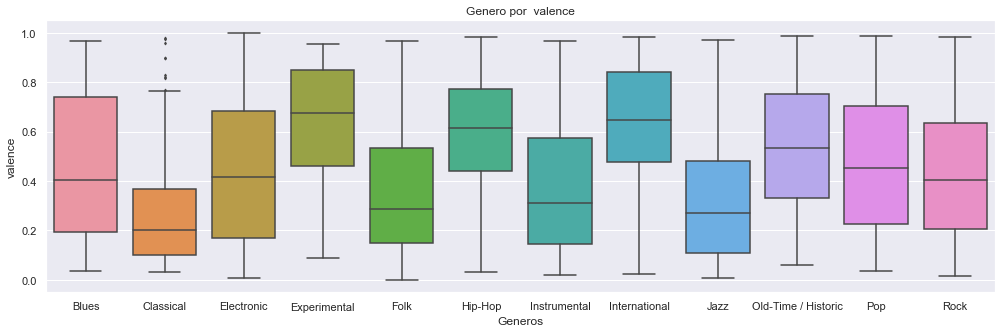

In [30]:
for x in lista_echones:
    boxplot_echonest (tracks, x)

In [31]:
tracks.genre_top.value_counts().index[0:5]
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'genre_top']
full_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

In [36]:
def compare_two_genres(df, genre_1, genre_2):
    _features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'genre_top']
    compare_mask = (df.genre_top == genre_1) | (df.genre_top == genre_2)
    _df = df[compare_mask][_features]
    sns.pairplot(_df,hue='genre_top',  plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'});


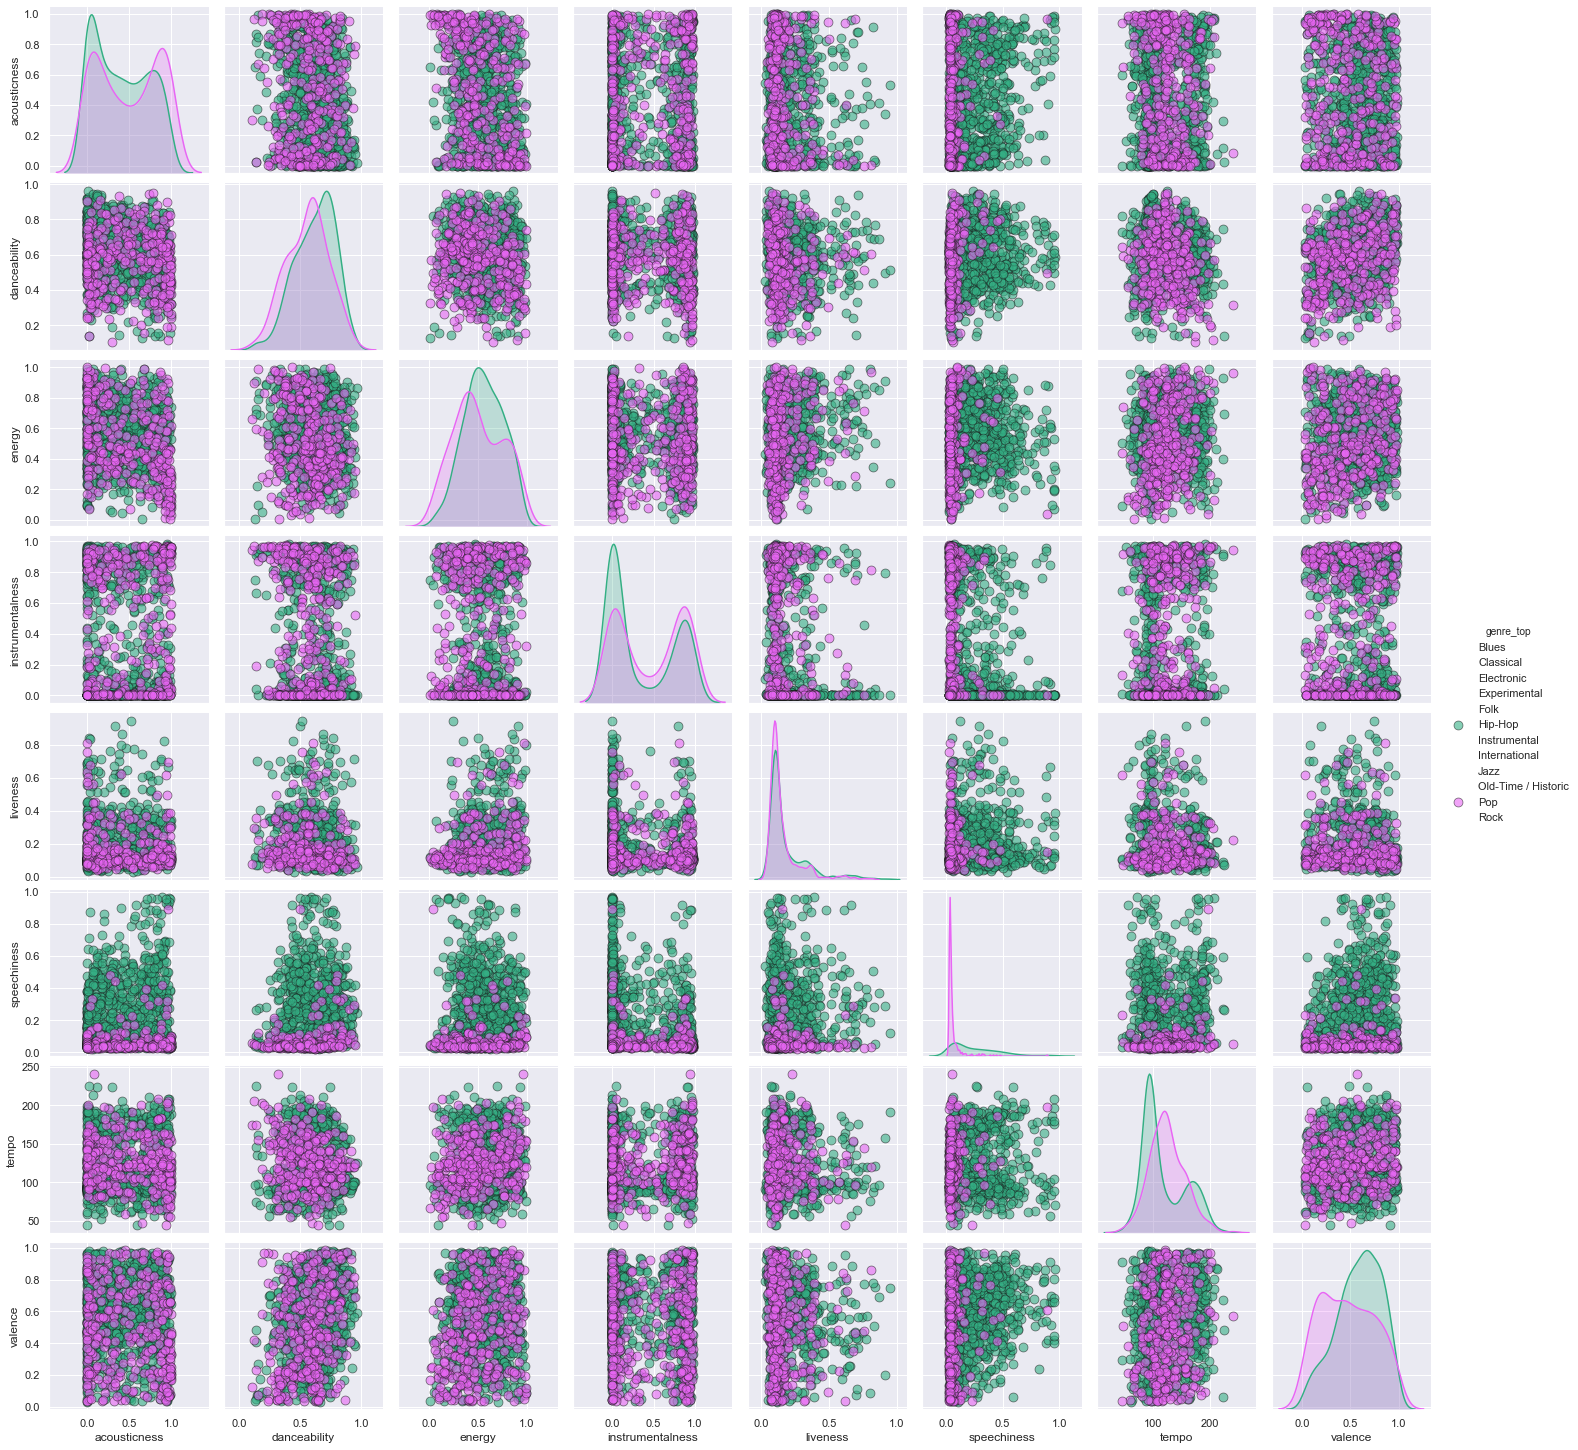

In [37]:
compare_two_genres(tracks, 'Hip-Hop', 'Pop')

In [38]:
def plot_features_profile(df, genre):
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    labels = features
    stats = df[df.genre_top == genre][features].mean().values
    
    stats=np.concatenate((stats,[stats[0]]))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title( genre +  " Profile")
    ax.grid(True)
    
    plt.show()

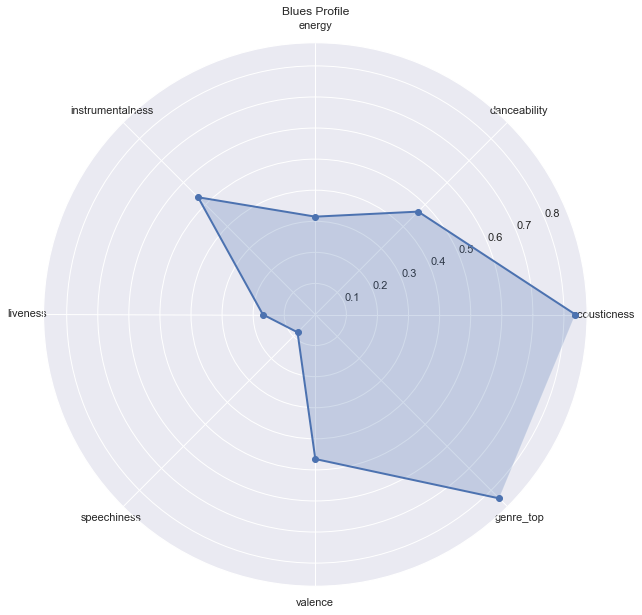

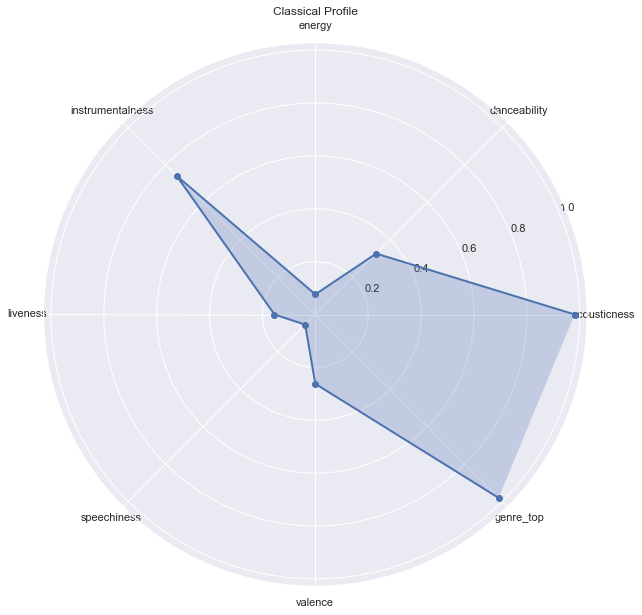

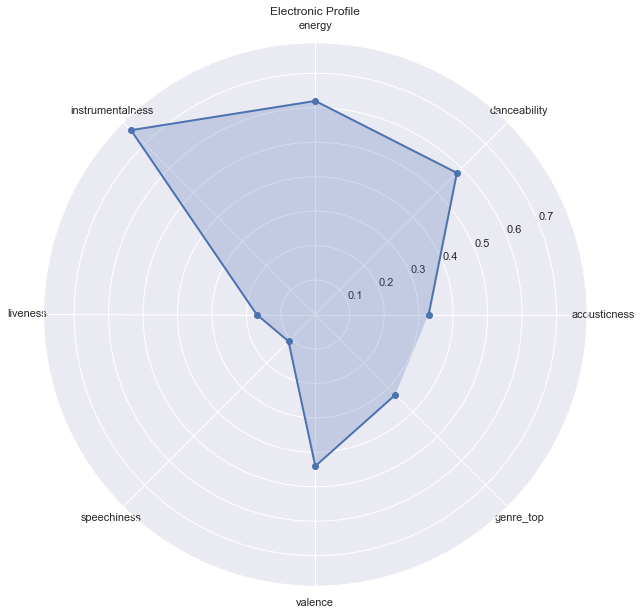

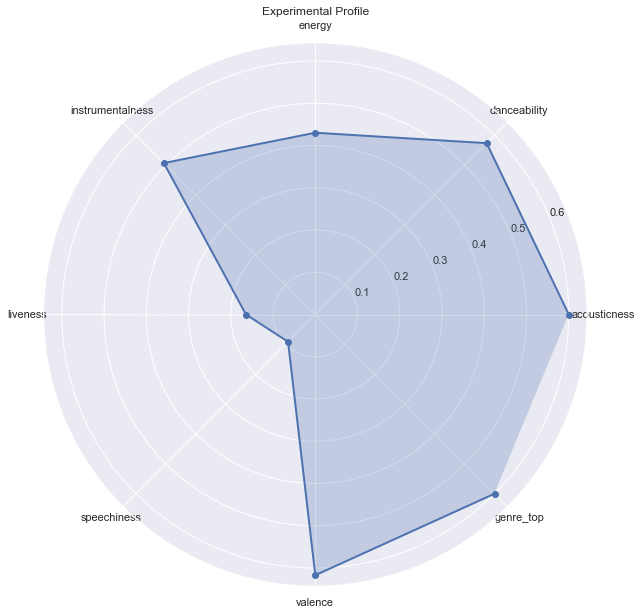

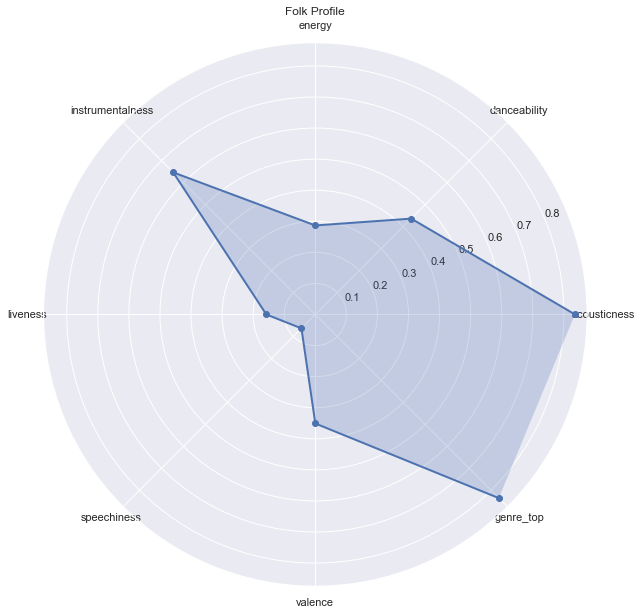

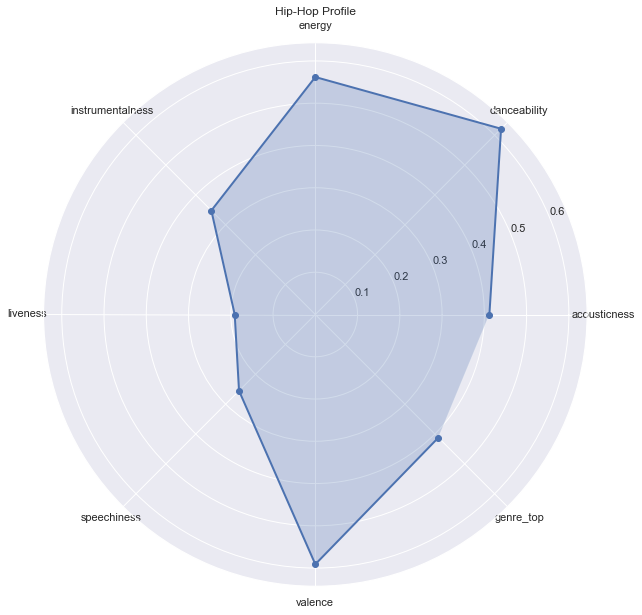

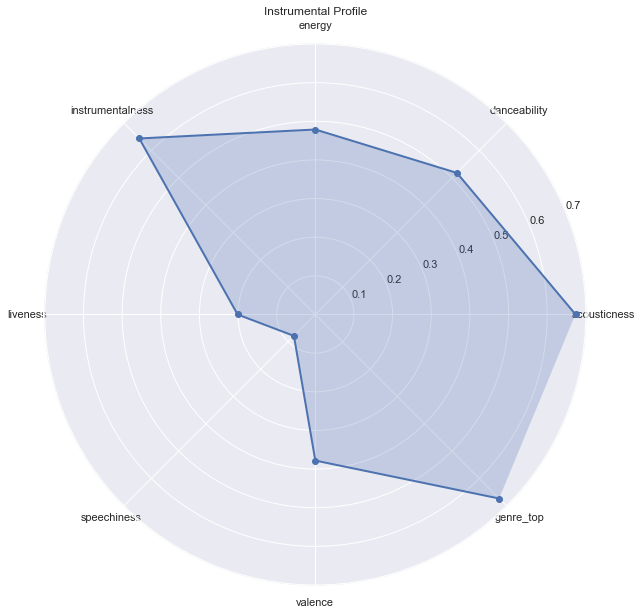

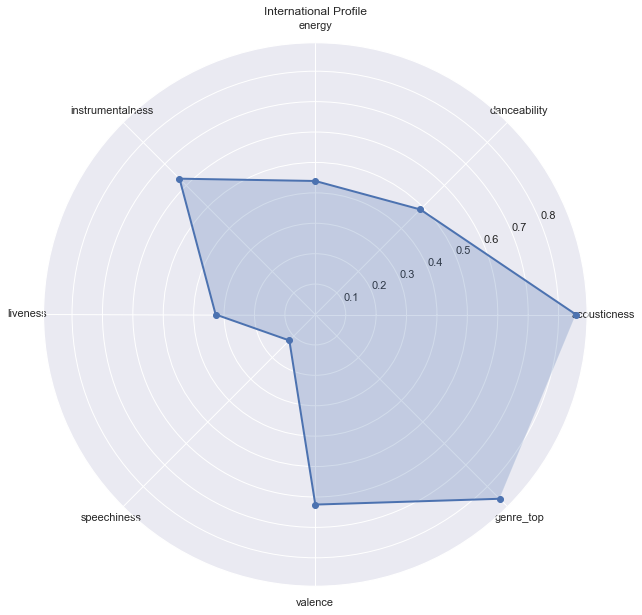

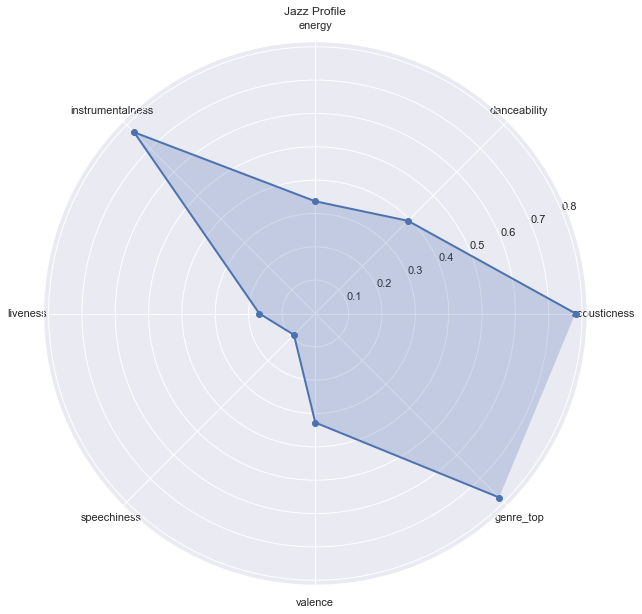

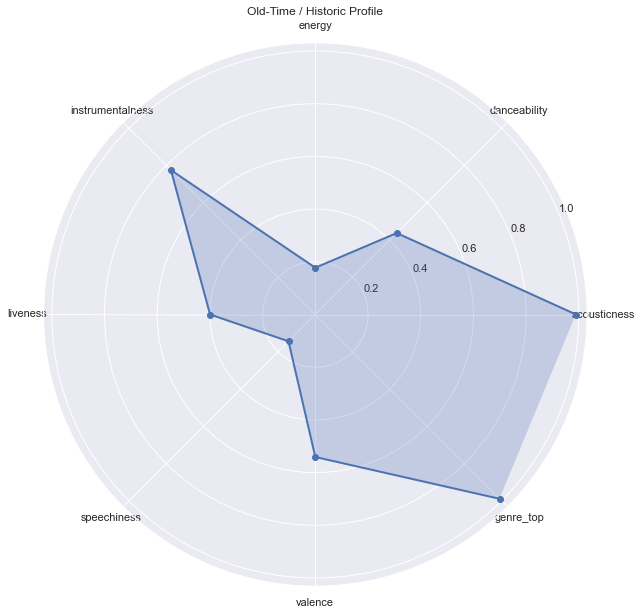

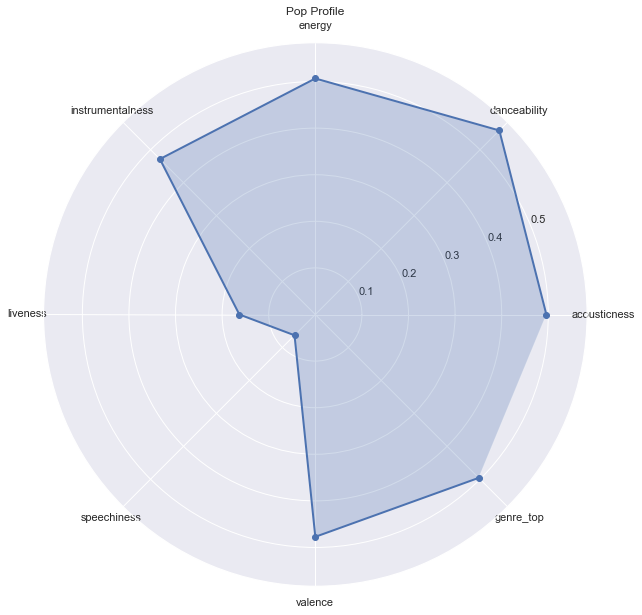

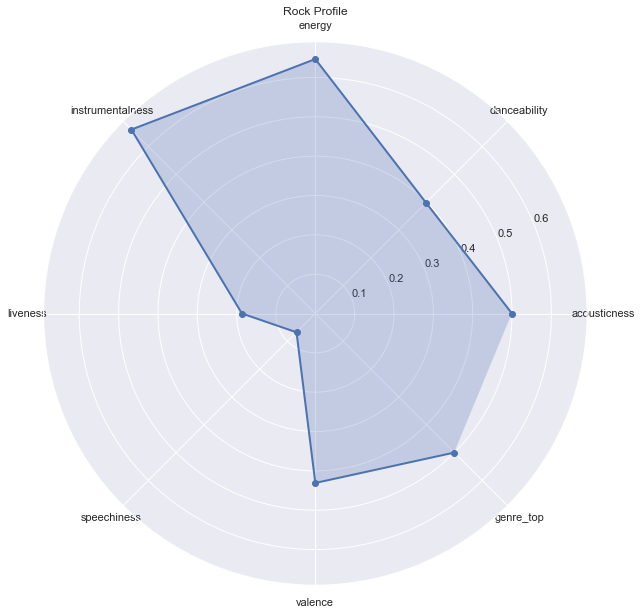

In [39]:
for x in lista_generos:
    plot_features_profile(tracks, x)

In [ ]:
# por localidad - ver dist de genero 
# por genero - ver localidad

In [42]:
tracks.groupby('genre_top')[features].mean()

acousticness  danceability    energy  instrumentalness  \
genre_top                                                                     
Blues                    0.836845      0.468183  0.314861          0.533580   
Classical                0.981822      0.325791  0.076260          0.742173   
Electronic               0.329104      0.581224  0.619838          0.756563   
Experimental             0.599967      0.573539  0.430228          0.506951   
Folk                     0.836154      0.436466  0.286584          0.646836   
Hip-Hop                  0.411949      0.621660  0.561950          0.347974   
Instrumental             0.673642      0.518254  0.478766          0.644247   
International            0.856967      0.488412  0.439041          0.631621   
Jazz                     0.780727      0.393156  0.336534          0.768854   
Old-Time / Historic      0.989268      0.437236  0.177538          0.774876   
Pop                      0.495906      0.558589  0.506594          0.471793   
Rock                     0.499883      0.398040  0.646678          0.661188   

                     liveness  speechiness   valence  
genre_top                                             
Blues                0.168881     0.081012  0.465059  
Classical            0.154451     0.054346  0.262251  
Electronic           0.170224     0.110024  0.440089  
Experimental         0.164140     0.091255  0.617081  
Folk                 0.157597     0.063143  0.350813  
Hip-Hop              0.190727     0.255320  0.591102  
Instrumental         0.201132     0.078290  0.378028  
International        0.327811     0.120761  0.625058  
Jazz                 0.167982     0.090685  0.327240  
Old-Time / Historic  0.399393     0.143830  0.540801  
Pop                  0.163039     0.063103  0.477159  
Rock                 0.186575     0.067570  0.430740

In [50]:
top_localidades=tracks.location.value_counts().head(10)
top_localidades

Brooklyn, NY             365
New York, NY             189
San Francisco, CA        173
Chicago, IL              154
Baltimore, MD            118
Providence, RI           111
Columbus, OH             101
Richmond, Virginia        97
Italy                     93
South Portland, Maine     91
Name: location, dtype: int64

<AxesSubplot:xlabel='location'>

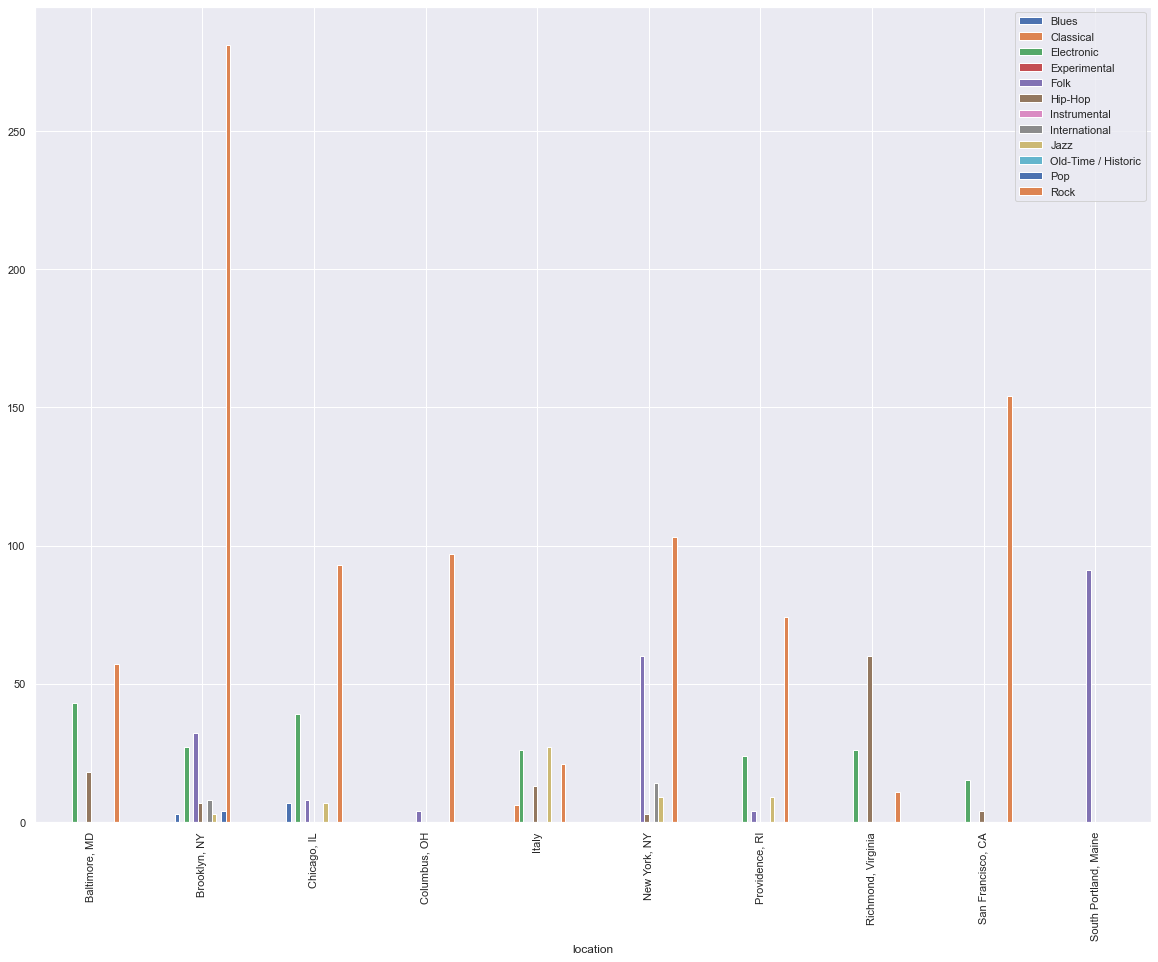

In [88]:
lista_top_localidades = top_localidades.index.tolist()
mask_localidades = tracks.location.isin(lista_top_localidades)

tracks[mask_localidades].groupby('location')[lista_generos].sum().plot(kind='bar', figsize=(20,15))